# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
temp_units ='imperial'

# query url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
weather_information_by_city = {}
for index, city in enumerate(cities):
    try:
        response = requests.get(query_url + city.replace(" ", "&")).json()
        cloudiness = response['clouds']['all']
        country = response['sys']['country']
        dt = response['dt']
        humidity = response['main']['humidity']
        max_temperature = response['main']['temp_max']
        lat = response['coord']['lat']
        lon = response['coord']['lon']
        wind_speed = response['wind']['speed']
        weather_information_by_city[city] = {
            'cloudiness': cloudiness,
            'country': country,
            'dt': dt,
            'humidity': humidity,
            'max_temperature': max_temperature,
            'lat': lat,
            'lon': lon,
            'wind_speed': wind_speed
        }
        print('Currently processing city %s with index %s', city, index)
    except requests.exceptions.HTTPError as err:
        print('HTTP Connection error occurred for city %s. Skipping...', city)
        print(err)
    except KeyError as err:
        print('Key error occurred for city %s. Skipping...', city)
        print(err)

Currently processing city %s with index %s clyde river 0
Currently processing city %s with index %s avarua 1
Currently processing city %s with index %s hermanus 2
Currently processing city %s with index %s jamestown 3
Key error occurred for city %s. Skipping... katunki
'clouds'
Currently processing city %s with index %s cape town 5
Currently processing city %s with index %s crotone 6
Currently processing city %s with index %s livingstone 7
Currently processing city %s with index %s albany 8
Currently processing city %s with index %s mataura 9
Currently processing city %s with index %s kimbe 10
Currently processing city %s with index %s puerto ayora 11
Currently processing city %s with index %s yilan 12
Currently processing city %s with index %s punta arenas 13
Currently processing city %s with index %s hwange 14
Key error occurred for city %s. Skipping... los llanos de aridane
'clouds'
Currently processing city %s with index %s atuona 16
Currently processing city %s with index %s trara

Currently processing city %s with index %s severo-kurilsk 145
Currently processing city %s with index %s ilheus 146
Key error occurred for city %s. Skipping... amderma
'clouds'
Currently processing city %s with index %s ulladulla 148
Currently processing city %s with index %s touros 149
Currently processing city %s with index %s bodden town 150
Currently processing city %s with index %s nipawin 151
Currently processing city %s with index %s aklavik 152
Currently processing city %s with index %s namchi 153
Currently processing city %s with index %s muriwai beach 154
Currently processing city %s with index %s shingu 155
Currently processing city %s with index %s saldanha 156
Currently processing city %s with index %s garibaldi 157
Currently processing city %s with index %s waipawa 158
Currently processing city %s with index %s naze 159
Currently processing city %s with index %s kawambwa 160
Currently processing city %s with index %s khatanga 161
Key error occurred for city %s. Skipping..

Currently processing city %s with index %s lieksa 290
Currently processing city %s with index %s nantucket 291
Currently processing city %s with index %s salina 292
Currently processing city %s with index %s oliveira dos brejinhos 293
Currently processing city %s with index %s lubao 294
Key error occurred for city %s. Skipping... temaraia
'clouds'
Currently processing city %s with index %s hamilton 296
Currently processing city %s with index %s broome 297
Currently processing city %s with index %s boyolangu 298
Key error occurred for city %s. Skipping... meyungs
'clouds'
Currently processing city %s with index %s vestmanna 300
Currently processing city %s with index %s fortuna 301
Currently processing city %s with index %s richards bay 302
Currently processing city %s with index %s saint-joseph 303
Currently processing city %s with index %s udachnyy 304
Currently processing city %s with index %s xichang 305
Key error occurred for city %s. Skipping... burkhala
'clouds'
Currently process

Currently processing city %s with index %s siniscola 434
Currently processing city %s with index %s atherton 435
Currently processing city %s with index %s sidi ali 436
Currently processing city %s with index %s nara 437


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
#Space junk
#type(weatherbycity_df)
#for col in weatherbycity_df: 
    #print(col) 
#weatherbycity_df.columns
#weatherbycity_df.set_index(city)
#pd.weatherbycity_df.transpose
#weatherbycity_df(t(df))
#weatherbycity_df[nrow(weatherbycity_df):1, ]

In [15]:
weatherbycity_df = pd.DataFrame(weather_information_by_city)
weatherbycity_df = weatherbycity_df.T
weatherbycity_df.index.name = 'City'

weatherbycity_df.head()

,cloudiness,country,dt,humidity,lat,lon,max_temperature,wind_speed
City,,,,,,,,
hasaki,75,JP,1567216442,74,35.73,140.83,84.2,4.7
hermanus,33,ZA,1567216443,97,-34.42,19.24,50,5.01
hilo,90,US,1567216443,62,19.71,-155.08,86,8.05
itacare,20,BR,1567216443,88,-14.28,-39,69.8,4.7
sabha,0,LY,1567216443,26,27.03,14.43,79.54,5.35


In [16]:
#output data to csv
weatherbycity_df.to_csv("weatherbycity.csv", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

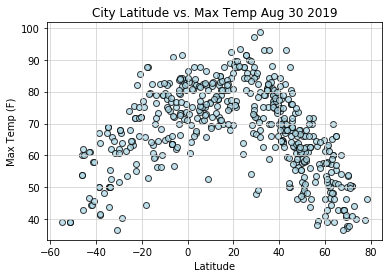

In [17]:
plt.scatter(weatherbycity_df["lat"],weatherbycity_df["max_temperature"], c="lightblue", alpha=0.75, edgecolor="black")
plt.title("City Latitude vs. Max Temp Aug 30 2019")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey") 
plt.savefig("fig1.jpg")
plt.show()

#### Latitude vs. Humidity Plot

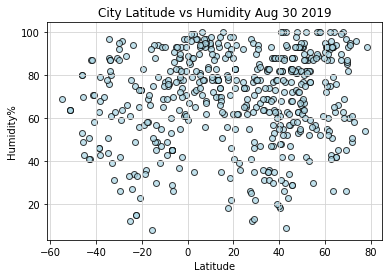

In [18]:
plt.scatter(weatherbycity_df["lat"],weatherbycity_df["humidity"], c="lightblue", alpha=0.75, edgecolor="black")
plt.title("City Latitude vs Humidity Aug 30 2019")
plt.xlabel("Latitude")
plt.ylabel("Humidity%")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey") 
plt.savefig("fig2.jpg")
plt.show()

#### Latitude vs. Cloudiness Plot

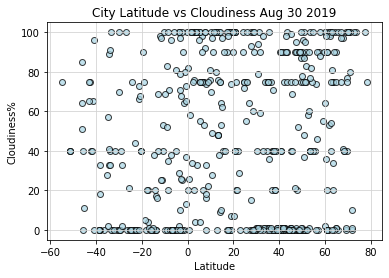

In [19]:
plt.scatter(weatherbycity_df["lat"],weatherbycity_df["cloudiness"], c="lightblue", alpha=0.75, edgecolor="black")
plt.title("City Latitude vs Cloudiness Aug 30 2019")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness%")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey") 
plt.savefig("fig3.jpg")
plt.show()

#### Latitude vs. Wind Speed Plot

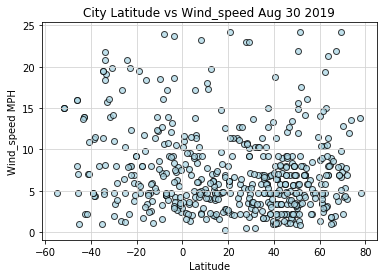

In [20]:
plt.scatter(weatherbycity_df["lat"],weatherbycity_df["wind_speed"], c="lightblue", alpha=0.75, edgecolor="black")
plt.title("City Latitude vs Wind_speed Aug 30 2019")
plt.xlabel("Latitude")
plt.ylabel("Wind_speed MPH")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey") 
plt.savefig("fig4.jpg")
plt.show()